<a href="https://colab.research.google.com/github/Prethumnan/guvi-project/blob/main/Boston_House_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

In [ ]:
from sklearn.datasets import load_boston
bos=load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#Constructing a dataframe using the boston data
data=pd.DataFrame(bos.data,columns=bos.feature_names)

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#Target value is missing from the data.Hence,We are adding it to our dataframe.
data["MEDV"]=bos.target

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#Checkin null values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


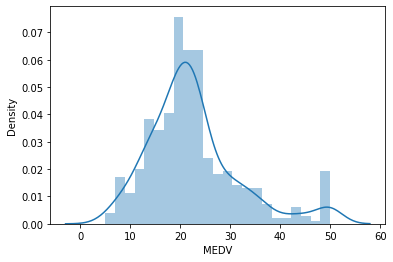

In [ ]:
#Let's check the distribution of our target variable
sns.distplot(data["MEDV"])

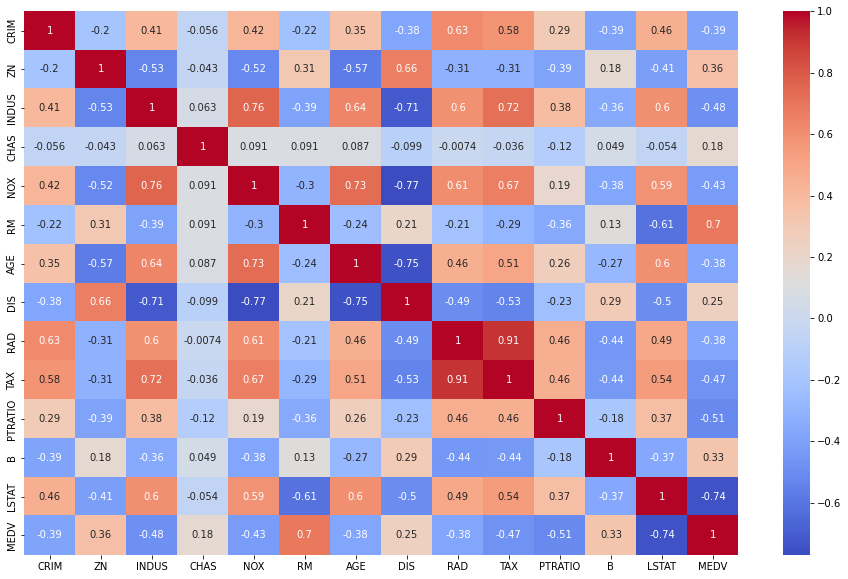

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),cmap="coolwarm",annot=True)

Text(0.5, 1.0, 'RM vs MEDV')

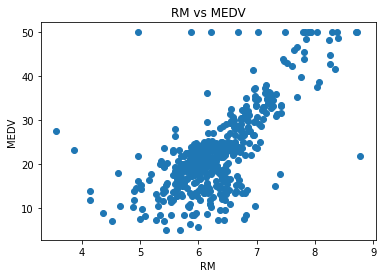

In [ ]:
plt.scatter(data["RM"],data["MEDV"])
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.title('RM vs MEDV')

Text(0.5, 1.0, 'LSTAT vs MEDV')

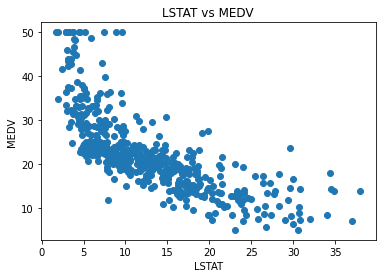

In [ ]:
plt.scatter(data["LSTAT"],data["MEDV"])
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.title("LSTAT vs MEDV")

In [ ]:
data["MEDV"]=np.log(1+data["MEDV"])

In [ ]:
data["MEDV"]

0      3.218876
1      3.117950
2      3.575151
3      3.538057
4      3.616309
         ...   
501    3.152736
502    3.072693
503    3.214868
504    3.135494
505    2.557227
Name: MEDV, Length: 506, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


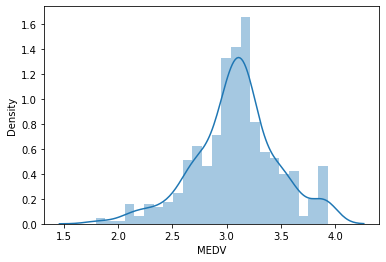

In [ ]:
sns.distplot(data["MEDV"])

In [ ]:
scale=sklearn.preprocessing.MinMaxScaler()
for i in data.columns[:-1]:
  data[i]=scale.fit_transform(data[[i]])

In [ ]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,3.218876
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,3.117950
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,3.575151
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,3.538057
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,3.616309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,3.152736
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,3.072693
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,3.214868
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,3.135494


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error
l=[i for i in data.columns[:-1]]
score=[]
for i in l:
  x=data[[i]]
  y=data["MEDV"]
  model=LinearRegression()
  model.fit(x,y)
  score.append([model.score(x,y),i])
score.sort()
score=score[::-1]
for i,j in score:
  print(j,":",i)

LSTAT : 0.6468881424169839
RM : 0.4062627088757186
TAX : 0.31229313550757076
INDUS : 0.29296029320144956
CRIM : 0.2711201466558283
NOX : 0.25897911750229696
PTRATIO : 0.254068875813653
RAD : 0.22895030617255507
AGE : 0.20443986611132237
B : 0.16061928347628807
ZN : 0.13332446881468063
DIS : 0.11542590424140198
CHAS : 0.025419546698559836


From the above observation we can choose the features which are having more r2 score

In [ ]:
x=data[["LSTAT","RM"]]
y=data["MEDV"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
print("slope : ",model.coef_)
print("intercept : ",model.intercept_)

slope :  [-1.27886073  0.72615046]
intercept :  3.093412731755874


In [ ]:
print("R2 Score of training dataset: ",model.score(x_train,y_train))

R2 Score of training dataset:  0.6830637740489853


In [ ]:
print("R2 Score of testing dataset : ",model.score(x_test,y_test))

R2 Score of testing dataset :  0.6662731709189598


In [ ]:
y_pred=model.predict(x_test)

In [ ]:
mean_squared_error(y_test,y_pred)

0.04989779926016559

In [ ]:
k=0.01
m=[]
for i in range(1000):
  ridge=Ridge(alpha=k)
  ridge.fit(x_train,y_train)
  cv=cross_val_score(ridge,x,y,cv=10)
  mean=np.mean(cv)
  m.append([mean*100,k])
  k+=0.01
m.sort()
m=m[::-1]
print(m[0])

[26.132214749216487, 4.789999999999942]


In [ ]:
ridge=Ridge(alpha=4.7)
ridge.fit(x_train,y_train)
print("Training score : ",model.score(x_train,y_train))
print("Testing score : ",ridge.score(x_test,y_test))

Training score :  0.6830637740489853
Testing score :  0.6480973929460981


In [ ]:
k=0.01
m=[]
for i in range(1000):
  lasso=Lasso(alpha=k)
  lasso.fit(x_train,y_train)
  cv=cross_val_score(lasso,x,y,cv=10)
  mean=np.mean(cv)
  m.append([mean*100,k])
  k+=0.01
m.sort()
m=m[::-1]
print(m[0])

[11.766775760703027, 0.01]


In [ ]:
lasso=Lasso(alpha=0.01)
lasso.fit(x_train,y_train)
print("Training score : ",lasso.score(x_train,y_train))
print("Testing score : ",lasso.score(x_test,y_test))

Training score :  0.6464971019053113
Testing score :  0.6593802844941543


In [ ]:
predicted=lasso.predict(x_test)

In [ ]:
final=x_test.copy()
final["Predicted MEDEV"]=predicted
final

,LSTAT,RM,Predicted MEDEV
125,0.360927,0.464648,3.000641
117,0.236479,0.471355,3.155301
129,0.458333,0.397777,2.865527
443,0.472406,0.560261,2.885284
288,0.161976,0.527687,3.259829
...,...,...,...
200,0.075055,0.684806,3.402633
353,0.076435,0.606821,3.383141
21,0.333885,0.460625,3.032997
289,0.214680,0.575589,3.205908
